# Day 13: Origami
The input for this problem is located at https://adventofcode.com/2021/day/13/input

In [1]:
%load_ext numpy_html

In [2]:
import re

import matplotlib.pyplot as plt

Load the problem. We can do this more concisely, but it's fun to imagine a more general class of problem in which we need to handle runs of different inputs.

In [3]:
with open("input.txt") as f:
    source = f.read()

In [4]:
source_dots, _, source_folds = source.partition("\n\n")

In [5]:
dots = [((int(i), int(j))) for i, j in re.findall(r"(\d+),(\d+)", source_dots)]
folds = [((ax, int(i))) for ax, i in re.findall(r"fold along (\w)=(\d+)", source_folds)]

In [6]:
def transpose(points):
    for x, y in points:
        yield y, x

In [7]:
def fold0(points, at):
    for x, y in points:
        if x > at:
            yield 2 * at - x, y
        elif x < at:
            yield x, y

In [8]:
def fold(points, axis, at):
    if axis == "y":
        return transpose(fold0(transpose(points), at))
    return fold0(points, at)

In [20]:
len(set(fold(dots, *folds[0])))

785

In [9]:
points = dots
for axis, at in folds:
    points = fold(points, axis, at)

In [10]:
def raster(points):
    import numpy as np

    x, y = np.array(list(points)).T
    grid = np.zeros((y.max() + 1, x.max() + 1), dtype=np.bool_)
    np.logical_or.at(grid, (y, x), 1)
    return grid

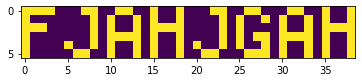

In [11]:
plt.imshow(raster(points));